In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
## Data
data = pd.read_csv(r"data.csv")

In [ ]:
## Datatype of each column in the dataframe
print(" \nData type of each column in a DataFrame : \n\n",
      data.dtypes)
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      data.isnull().sum())
##data summary
print(" \nGeneral stats of DataFrame : \n\n",data.describe())

 
Data type of each column in a DataFrame : 

 recency            int64
history          float64
used_discount      int64
used_bogo          int64
zip_code          object
is_referral        int64
channel           object
offer             object
conversion         int64
dtype: object
 
Count total NaN at each column in a DataFrame : 

 recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64
 
General stats of DataFrame : 

             recency       history  used_discount     used_bogo   is_referral  \
count  64000.000000  64000.000000   64000.000000  64000.000000  64000.000000   
mean       5.763734    242.085656       0.551031      0.549719      0.502250   
std        3.507592    256.158608       0.497393      0.497526      0.499999   
min        1.000000     29.990000       0.000000      0.000000      0.000000   
25%        2.000000     64.660000       0.0

In [ ]:
##one-hot encoding
df = pd.get_dummies(data)

array([[<Axes: title={'center': 'recency'}>,
        <Axes: title={'center': 'history'}>,
        <Axes: title={'center': 'used_discount'}>],
       [<Axes: title={'center': 'used_bogo'}>,
        <Axes: title={'center': 'is_referral'}>,
        <Axes: title={'center': 'zip_code_Rural'}>],
       [<Axes: title={'center': 'zip_code_Surburban'}>,
        <Axes: title={'center': 'zip_code_Urban'}>,
        <Axes: title={'center': 'channel_Multichannel'}>],
       [<Axes: title={'center': 'channel_Phone'}>,
        <Axes: title={'center': 'channel_Web'}>, <Axes: >]], dtype=object)

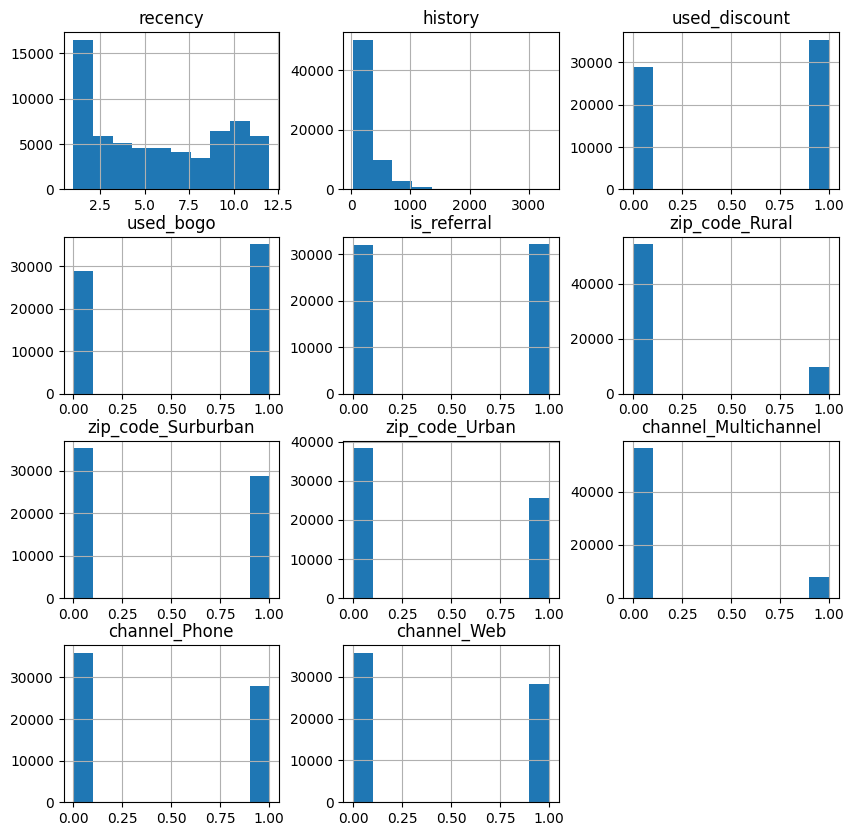

In [ ]:
## Data Distribution Visualization
features = ['recency', 'history', 'used_discount', 'used_bogo', 'is_referral', 'zip_code_Rural', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Multichannel', 'channel_Phone', 'channel_Web']
df[features].hist(figsize=(10,10))

<Axes: >

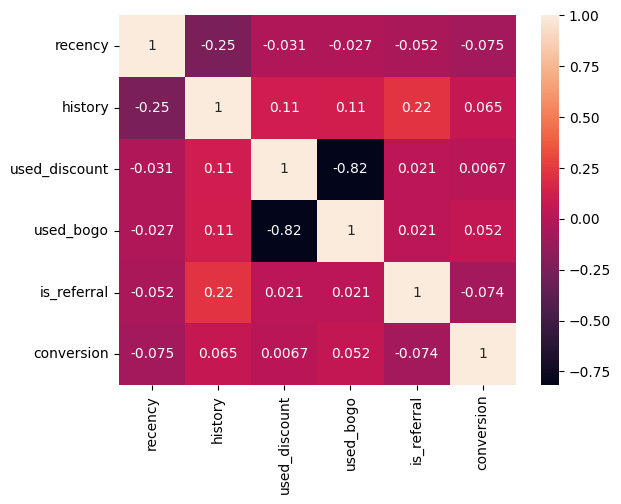

In [ ]:
#Confusion Matrix
sns.heatmap(data[['recency', 'history', 'used_discount', 'used_bogo', 'is_referral','conversion']].corr(),annot=True)

## Feature based Date Visualization

Recency

In [ ]:
conversion2=[]
for i in range(0,len(data)):
    if data['conversion'][i]==0:
        conversion2.append('Did not convert')
    else:
        conversion2.append('Converted')
data['conversion2']=conversion2
px.histogram(data['recency'],color=data['conversion2'],barnorm='percent',labels={'value':'Recency'},title='Conversation rate per recency level')

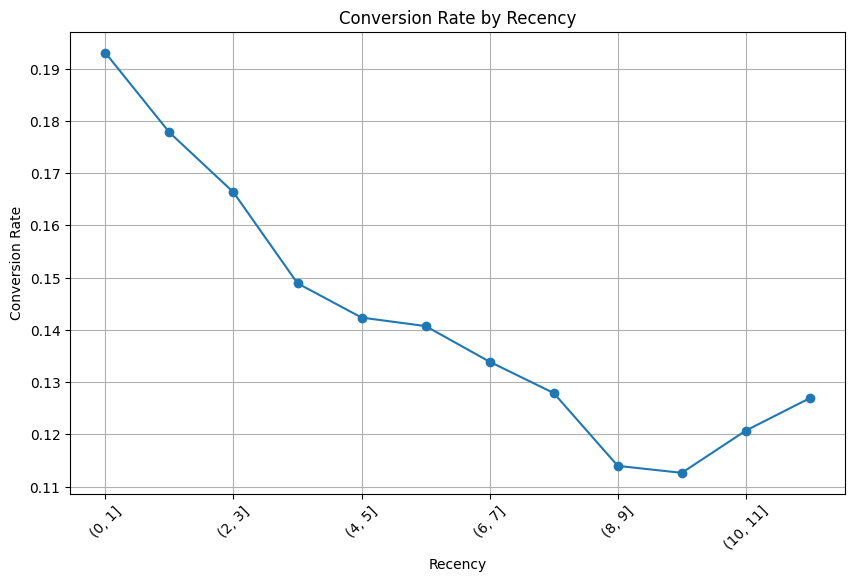

In [ ]:
recency_bins = pd.cut(data['recency'], bins=range(0, 13))
conversion_rate_by_recency = data.groupby(recency_bins)['conversion'].mean()

plt.figure(figsize=(10, 6))
conversion_rate_by_recency.plot(kind='line', marker='o')
plt.xlabel('Recency')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Recency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

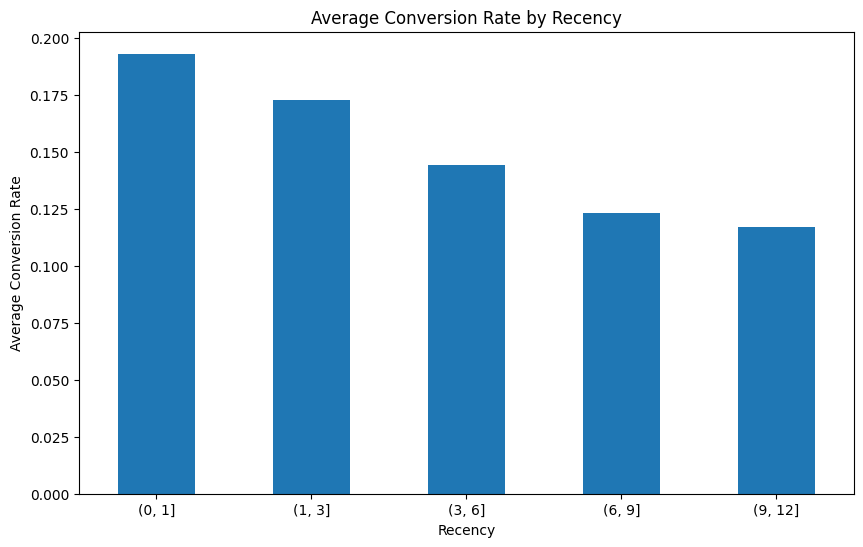

In [ ]:
recency_bins = pd.cut(data['recency'], bins=[0, 1, 3, 6, 9, 12])
conversion_rate_by_recency = data.groupby(recency_bins)['conversion'].mean()

plt.figure(figsize=(10, 6))
conversion_rate_by_recency.plot(kind='bar', rot=0)
plt.xlabel('Recency')
plt.ylabel('Average Conversion Rate')
plt.title('Average Conversion Rate by Recency')
plt.show()

Here we observe a negative relation between conversion rate and customer purchasing recency.

History

In [ ]:
px.box(x=data['conversion2'],y=data['history'],color=data['conversion2'],points='outliers',labels={'x':'Conversion','y':'history'},title='Boxplot of history for those who converted and those who did not')

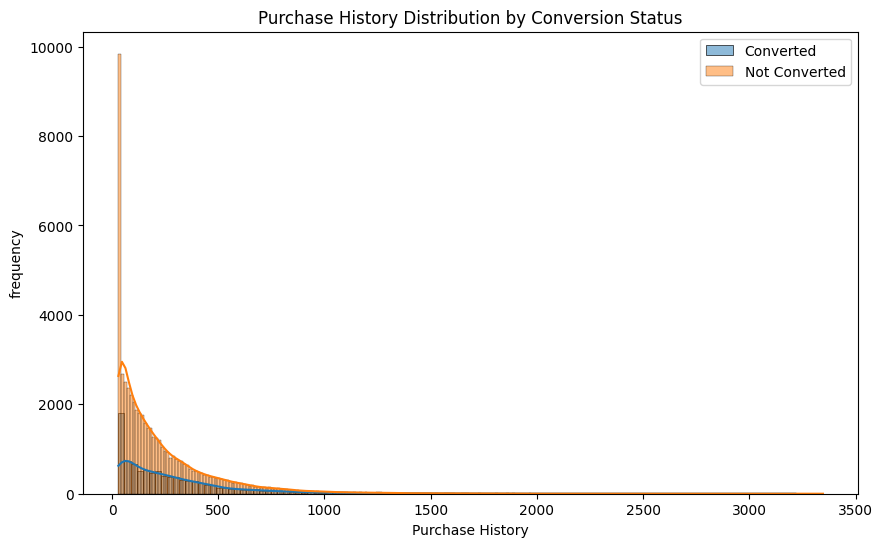

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['conversion'] == 1]['history'], label='Converted', kde=True)
sns.histplot(df[df['conversion'] == 0]['history'], label='Not Converted', kde=True)
plt.xlabel('Purchase History')
plt.ylabel('frequency')
plt.legend()
plt.title('Purchase History Distribution by Conversion Status')
plt.show()

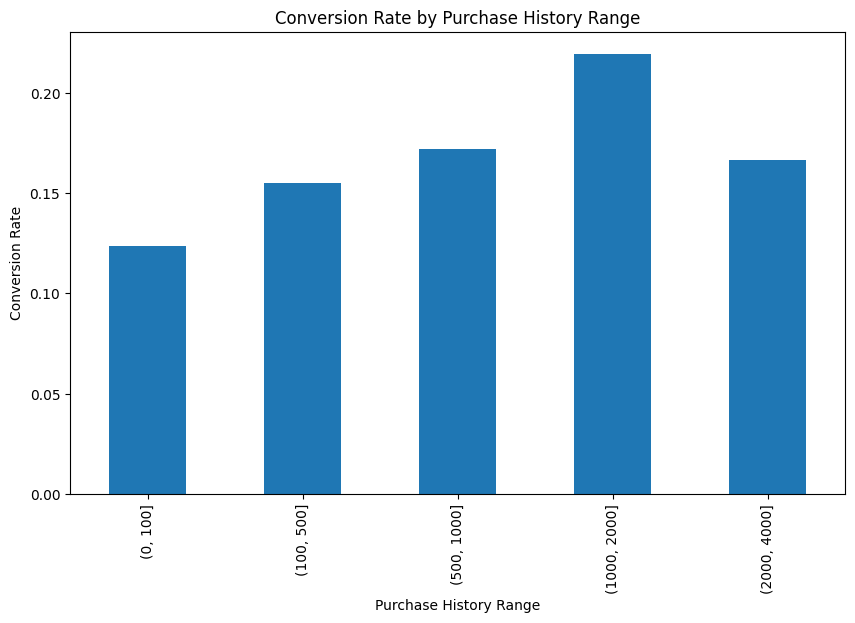

In [ ]:
purchase_bins = pd.cut(df['history'], bins=[0, 100, 500, 1000, 2000, 4000])
conversion_rate_by_bins = df.groupby(purchase_bins)['conversion'].mean()
plt.figure(figsize=(10, 6))
conversion_rate_by_bins.plot(kind='bar')
plt.xlabel('Purchase History Range')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Purchase History Range')
plt.show()

Offer

In [ ]:
px.sunburst(data,path=['conversion2','offer'])

In [ ]:
data0=data[data['conversion']==0]
data1=data[data['conversion']==1]
fig = go.Figure()
fig.add_trace(go.Histogram(x=data0['offer'],name='Did Not convert'))
fig.add_trace(go.Histogram(x=data1['offer'],name='Converted'))
fig.update_layout(barmode='group',xaxis_title='Offer',yaxis_title='Frequency',title='Frequency of Conversions by offer type')
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
tempdata3=pd.DataFrame(data[['offer','conversion']].value_counts()).reset_index().rename(columns={0:'Freq'}).sort_values(by='offer').reset_index(drop=True)
full=[]
for i in range(0,len(tempdata3),2):
    for j in range(0,2):
        full.append(tempdata3['Freq'][i]+tempdata3['Freq'][i+1])
tempdata3['full']=full
tempdata3['perc']=tempdata3['Freq']/tempdata3['full']
data0=tempdata3[tempdata3['conversion']==0]
data1=tempdata3[tempdata3['conversion']==1]
fig = go.Figure()
fig.add_trace(go.Bar(x=data0['offer'],y=data0['perc'],name='Did Not convert'))
fig.add_trace(go.Bar(x=data1['offer'],y=data1['perc'],name='Converted'))
fig.update_layout(barmode='group',xaxis_title='Offer',yaxis_title='Percentage',title='Conversion Rates by offer type')
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
px.treemap(data,path=[px.Constant('All Data'),'conversion2','offer'],color='history',color_continuous_scale='RdBu')

Zip Code

In [ ]:
px.sunburst(data,path=['conversion2','zip_code'])

In [ ]:
data0=data[data['conversion']==0]
data1=data[data['conversion']==1]
fig = go.Figure()
fig.add_trace(go.Histogram(x=data0['zip_code'],name='Did Not convert'))
fig.add_trace(go.Histogram(x=data1['zip_code'],name='Converted'))
fig.update_layout(barmode='group',xaxis_title='Area',yaxis_title='Frequency',title='Frequency of Conversions by Area')
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
tempdata2=pd.DataFrame(data[['zip_code','conversion']].value_counts()).reset_index().rename(columns={0:'Freq'}).sort_values(by='zip_code').reset_index(drop=True)
full=[]
for i in range(0,len(tempdata2),2):
    for j in range(0,2):
        full.append(tempdata2['Freq'][i]+tempdata2['Freq'][i+1])
tempdata2['full']=full
tempdata2['perc']=tempdata2['Freq']/tempdata2['full']
data0=tempdata2[tempdata2['conversion']==0]
data1=tempdata2[tempdata2['conversion']==1]
fig = go.Figure()
fig.add_trace(go.Bar(x=data0['zip_code'],y=data0['perc'],name='Did Not convert'))
fig.add_trace(go.Bar(x=data1['zip_code'],y=data1['perc'],name='Converted'))
fig.update_layout(barmode='group',xaxis_title='Area',yaxis_title='Percentage',title='Conversion Rates by Area')
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
px.treemap(data,path=[px.Constant('All Data'),'conversion2','zip_code'],color='history',color_continuous_scale='RdBu')

Channel

In [ ]:
px.sunburst(data,path=['conversion2','channel'])

In [ ]:
px.treemap(data,path=[px.Constant('All Data'),'conversion2','channel'],color='history',color_continuous_scale='RdBu')

In [ ]:
tempdata4=pd.DataFrame(data[['channel','conversion']].value_counts()).reset_index().rename(columns={0:'Freq'}).sort_values(by='channel').reset_index(drop=True)
full=[]
for i in range(0,len(tempdata4),2):
    for j in range(0,2):
        full.append(tempdata4['Freq'][i]+tempdata4['Freq'][i+1])
tempdata4['full']=full
tempdata4['perc']=tempdata4['Freq']/tempdata4['full']
data0=tempdata4[tempdata4['conversion']==0]
data1=tempdata4[tempdata4['conversion']==1]
fig = go.Figure()
fig.add_trace(go.Bar(x=data0['channel'],y=data0['perc'],name='Did Not convert'))
fig.add_trace(go.Bar(x=data1['channel'],y=data1['perc'],name='Converted'))
fig.update_layout(barmode='group',xaxis_title='channel',yaxis_title='Percentage',title='Conversion Rates by channel type')
fig.update_traces(opacity=0.75)
fig.show()

Referral

In [ ]:
ref=[]
for i in range(0,len(data)):
    if data['is_referral'][i]==0:
        ref.append('not referred')
    else:
        ref.append('referred')
data['reference']=ref
px.treemap(data,path=[px.Constant('All Data'),'conversion2','reference'],color='history',color_continuous_scale='RdBu')

##Modeling

In [ ]:

from itertools import combinations

import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes as nb
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import svm
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data = data.rename(columns={'conversion': 'target'})
# Rename & Label encode treatment column
data = data.rename(columns={'offer': 'treatment'})
data.treatment = data.treatment.map({'No Offer': 0, 'Buy One Get One': 1, 'Discount': 1})
data

recency  history  used_discount  used_bogo   zip_code  is_referral  \
0           10   142.44              1          0  Surburban            0   
1            6   329.08              1          1      Rural            1   
2            7   180.65              0          1  Surburban            1   
3            9   675.83              1          0      Rural            1   
4            2    45.34              1          0      Urban            0   
...        ...      ...            ...        ...        ...          ...   
63995       10   105.54              1          0      Urban            0   
63996        5    38.91              0          1      Urban            1   
63997        6    29.99              1          0      Urban            1   
63998        1   552.94              1          0  Surburban            1   
63999        1   472.82              0          1  Surburban            0   

            channel  treatment  target      conversion2  
0             Phone          1       0  Did not convert  
1               Web          0       0  Did not convert  
2               Web          1       0  Did not convert  
3               Web          1       0  Did not convert  
4               Web          1       0  Did not convert  
...             ...        ...     ...              ...  
63995           Web          1       0  Did not convert  
63996         Phone          1       0  Did not convert  
63997         Phone          1       0  Did not convert  
63998  Multichannel          1       0  Did not convert  
63999           Web          1       0  Did not convert  

[64000 rows x 10 columns]

In [ ]:
df_model = pd.get_dummies(data)

In [ ]:
df_model

recency  history  used_discount  used_bogo  is_referral  treatment  \
0           10   142.44              1          0            0          1   
1            6   329.08              1          1            1          0   
2            7   180.65              0          1            1          1   
3            9   675.83              1          0            1          1   
4            2    45.34              1          0            0          1   
...        ...      ...            ...        ...          ...        ...   
63995       10   105.54              1          0            0          1   
63996        5    38.91              0          1            1          1   
63997        6    29.99              1          0            1          1   
63998        1   552.94              1          0            1          1   
63999        1   472.82              0          1            0          1   

       target  zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
0           0               0                   1               0   
1           0               1                   0               0   
2           0               0                   1               0   
3           0               1                   0               0   
4           0               0                   0               1   
...       ...             ...                 ...             ...   
63995       0               0                   0               1   
63996       0               0                   0               1   
63997       0               0                   0               1   
63998       0               0                   1               0   
63999       0               0                   1               0   

       channel_Multichannel  channel_Phone  channel_Web  \
0                         0              1            0   
1                         0              0            1   
2                         0              0            1   
3                         0              0            1   
4                         0              0            1   
...                     ...            ...          ...   
63995                     0              0            1   
63996                     0              1            0   
63997                     0              1            0   
63998                     1              0            0   
63999                     0              0            1   

       conversion2_Converted  conversion2_Did not convert  
0                          0                            1  
1                          0                            1  
2                          0                            1  
3                          0                            1  
4                          0                            1  
...                      ...                          ...  
63995                      0                            1  
63996                      0                            1  
63997                      0                            1  
63998                      0                            1  
63999                      0                            1  

[64000 rows x 15 columns]

will treat the customer differently who recieved buy one get one offer and the customer who received discount offers.

In [ ]:
#df_model_bogo = df_model.copy().loc[df_model.treatment <=0].reset_index(drop=True)
#df_model_discount = df_model.copy().loc[df_model.treatment >=0].reset_index(drop=True)
df_model_offer = df_model.copy().loc[df_model.treatment >=0].reset_index(drop=True)

In [ ]:
df_model_offer

recency  history  used_discount  used_bogo  is_referral  treatment  \
0           10   142.44              1          0            0          1   
1            6   329.08              1          1            1          0   
2            7   180.65              0          1            1          1   
3            9   675.83              1          0            1          1   
4            2    45.34              1          0            0          1   
...        ...      ...            ...        ...          ...        ...   
63995       10   105.54              1          0            0          1   
63996        5    38.91              0          1            1          1   
63997        6    29.99              1          0            1          1   
63998        1   552.94              1          0            1          1   
63999        1   472.82              0          1            0          1   

       target  zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
0           0               0                   1               0   
1           0               1                   0               0   
2           0               0                   1               0   
3           0               1                   0               0   
4           0               0                   0               1   
...       ...             ...                 ...             ...   
63995       0               0                   0               1   
63996       0               0                   0               1   
63997       0               0                   0               1   
63998       0               0                   1               0   
63999       0               0                   1               0   

       channel_Multichannel  channel_Phone  channel_Web  \
0                         0              1            0   
1                         0              0            1   
2                         0              0            1   
3                         0              0            1   
4                         0              0            1   
...                     ...            ...          ...   
63995                     0              0            1   
63996                     0              1            0   
63997                     0              1            0   
63998                     1              0            0   
63999                     0              0            1   

       conversion2_Converted  conversion2_Did not convert  
0                          0                            1  
1                          0                            1  
2                          0                            1  
3                          0                            1  
4                          0                            1  
...                      ...                          ...  
63995                      0                            1  
63996                      0                            1  
63997                      0                            1  
63998                      0                            1  
63999                      0                            1  

[64000 rows x 15 columns]

Customer Classification:
1. Pursuable Customers(Positive Uplift): Customer that converted after receiving an offer. (cateogory 0)
2. Sure Customers(Zero Uplift): Customers that make a purchase without an offer. (Category 1)


In [ ]:
def customer_cat(df:pd.DataFrame):
  #customer with offer Responders(TR)
  df['target_class'] = 0
  ## customer without offer(TR)
  df.loc[(df.treatment == 0) & (df.target != 0),'target_class'] = 1
  return df

In [ ]:
#df_model_bogo = customer_cat(df_model_bogo)
#df_model_discount = customer_cat(df_model_discount)
df_model_offer =  customer_cat(df_model_offer)

In [ ]:
df_model_offer

recency  history  used_discount  used_bogo  is_referral  treatment  \
0           10   142.44              1          0            0          1   
1            6   329.08              1          1            1          0   
2            7   180.65              0          1            1          1   
3            9   675.83              1          0            1          1   
4            2    45.34              1          0            0          1   
...        ...      ...            ...        ...          ...        ...   
63995       10   105.54              1          0            0          1   
63996        5    38.91              0          1            1          1   
63997        6    29.99              1          0            1          1   
63998        1   552.94              1          0            1          1   
63999        1   472.82              0          1            0          1   

       target  zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
0           0               0                   1               0   
1           0               1                   0               0   
2           0               0                   1               0   
3           0               1                   0               0   
4           0               0                   0               1   
...       ...             ...                 ...             ...   
63995       0               0                   0               1   
63996       0               0                   0               1   
63997       0               0                   0               1   
63998       0               0                   1               0   
63999       0               0                   1               0   

       channel_Multichannel  channel_Phone  channel_Web  \
0                         0              1            0   
1                         0              0            1   
2                         0              0            1   
3                         0              0            1   
4                         0              0            1   
...                     ...            ...          ...   
63995                     0              0            1   
63996                     0              1            0   
63997                     0              1            0   
63998                     1              0            0   
63999                     0              0            1   

       conversion2_Converted  conversion2_Did not convert  target_class  
0                          0                            1             0  
1                          0                            1             0  
2                          0                            1             0  
3                          0                            1             0  
4                          0                            1             0  
...                      ...                          ...           ...  
63995                      0                            1             0  
63996                      0                            1             0  
63997                      0                            1             0  
63998                      0                            1             0  
63999                      0                            1             0  

[64000 rows x 16 columns]

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
X = df_model.drop(['target','target_class'],axis=1)
    y = df_model.target_class
    X_train, X_test, \
    y_train, y_test  = train_test_split(X,
                                       y,
                                       test_size=0.3,
                                       random_state=42,
                                       stratify=df_model['treatment'])

In [ ]:
X = df_model_offer.drop(['target','target_class'],axis=1)
y = df_model_offer.target_class

result = pd.DataFrame(X).copy()
uplift_model \
    = xgb.XGBClassifier().fit(X.drop('treatment', axis=1), y)
uplift_proba \
    = uplift_model.predict_proba(X.drop('treatment', axis=1))
result['proba_offer'] = uplift_proba[:,0]
result['proba_wo_offer'] = uplift_proba[:,1]

In [ ]:
result['uplift_score'] = result.eval('\
    proba_offer/(proba_offer+proba_wo_offer) \
    - proba_wo_offer/(proba_offer+proba_wo_offer)')

In [ ]:
px.histogram(x = result['proba_wo_offer'])

In [ ]:
def promotion_strategy(df):
    promotions = []  # Initialize a list to store the promotion decisions

    # Loop through the DataFrame rows and make promotion decisions
    for index, row in df.iterrows():
        if row['proba_offer'] > row['proba_wo_offer']:
            promotions.append('Yes')  # Offer promotion
        else:
            promotions.append('No')   # No promotion

    return promotions

In [ ]:
result['promotion'] = promotion_strategy(result)

In [ ]:
pd.DataFrame(result['promotion']).value_counts()

promotion
Yes          63498
No             502
dtype: int64

In [ ]:
# Split the test data into treatment and control groups based on the 'treatment' column
treatment_group = result[result['treatment'] == 1]
control_group = result[result['treatment'] == 0]

In [ ]:
treatment_group['promot']

recency  history  used_discount  used_bogo  is_referral  treatment  \
0           10   142.44              1          0            0          1   
2            7   180.65              0          1            1          1   
3            9   675.83              1          0            1          1   
4            2    45.34              1          0            0          1   
5            6   134.83              0          1            0          1   
...        ...      ...            ...        ...          ...        ...   
63995       10   105.54              1          0            0          1   
63996        5    38.91              0          1            1          1   
63997        6    29.99              1          0            1          1   
63998        1   552.94              1          0            1          1   
63999        1   472.82              0          1            0          1   

       target  zip_code_Rural  zip_code_Surburban  zip_code_Urban  \
0           0               0                   1               0   
2           0               0                   1               0   
3           0               1                   0               0   
4           0               0                   0               1   
5           1               0                   1               0   
...       ...             ...                 ...             ...   
63995       0               0                   0               1   
63996       0               0                   0               1   
63997       0               0                   0               1   
63998       0               0                   1               0   
63999       0               0                   1               0   

       channel_Multichannel  channel_Phone  channel_Web  \
0                         0              1            0   
2                         0              0            1   
3                         0              0            1   
4                         0              0            1   
5                         0              1            0   
...                     ...            ...          ...   
63995                     0              0            1   
63996                     0              1            0   
63997                     0              1            0   
63998                     1              0            0   
63999                     0              0            1   

       conversion2_Converted  conversion2_Did not convert  proba_offer  \
0                          0                            1     0.999981   
2                          0                            1     0.999973   
3                          0                            1     0.999979   
4                          0                            1     0.999992   
5                          1                            0     0.742341   
...                      ...                          ...          ...   
63995                      0                            1     0.999984   
63996                      0                            1     0.999987   
63997                      0                            1     0.999989   
63998                      0                            1     0.999988   
63999                      0                            1     0.999987   

       proba_wo_offer  uplift_score promotion  
0            0.000019      0.999963       Yes  
2            0.000027      0.999947       Yes  
3            0.000021      0.999958       Yes  
4            0.000008      0.999984       Yes  
5            0.257659      0.484681       Yes  
...               ...           ...       ...  
63995        0.000016      0.999967       Yes  
63996        0.000013      0.999974       Yes  
63997        0.000011      0.999977       Yes  
63998        0.000012      0.999975       Yes  
63999        0.000013      0.999973       Yes  

[42694 rows x 19 columns]

In [ ]:
conversion_rate_treatment = treatment_group[treatment_group['promotion'] == 'Yes']['target'].mean()
conversion_rate_control = control_group[control_group['promotion'] == 'Yes']['target'].mean()

In [ ]:
conversion_rate_treatment

0.16609215617305664

In [ ]:
conversion_rate_control

0.08675010789814415

Evaluation

Text(0.5, 1.0, 'Qini Curve - Discount')

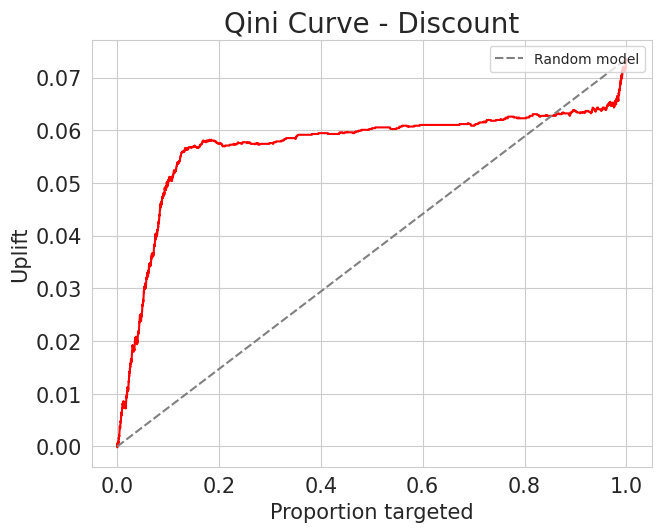

In [ ]:
qini(discount_uplift)
plt.title('Qini Curve - Discount',fontsize=20)